In [89]:

import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import csv

# Global style variables
fontsize = 15
label_size = 13
y_offset = 0.965
alpha = 0.8

# Correlation between two metrics with linear regression
def correlation_lin(pvt_df, save_folder, metric1, metric2, metric3, lines=False, flip_x=False, flip_y=False):
    
    if flip_x and not flip_y:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif flip_y and not flip_x:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif (flip_x and flip_y) or (not flip_x and not flip_y):
        correlation_coefficient = pvt_df[metric1].corr(pvt_df[metric2])
    
    slope, intercept, r_value, p_value, std_err = linregress(pvt_df[metric1], pvt_df[metric2])
    line = slope * pvt_df[metric1] + intercept

    plt.figure(figsize=(8, 5.5))
    palette = sns.color_palette('husl', len(pvt_df[metric3].unique()))
    color_dict = dict(zip(pvt_df[metric3].unique(), palette))
    sns.scatterplot(data=pvt_df, x=metric1, y=metric2, hue=metric3, alpha=alpha, palette=color_dict)
    plt.plot(pvt_df[metric1], line, 'r')
    
    if lines == True:
        for m3 in pvt_df[metric3].unique():
            df_subset = pvt_df[pvt_df[metric3] == m3]
            df_subset = df_subset.sort_values(by=metric1)
            plt.plot(df_subset[metric1], df_subset[metric2], color=color_dict[m3], linewidth=0.5)

    if flip_x == True:
        plt.gca().invert_xaxis()
    
    if flip_y == True:
        plt.gca().invert_yaxis()

    plt.title(f'Correlation between {metric1} and {metric2}', fontsize=14)
    plt.xlabel(metric1.capitalize())
    plt.ylabel(metric2.capitalize())
    plt.text(0.05, 0.05, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.3f}', 
             transform=plt.gca().transAxes, va='bottom', fontsize=8)
    plt.legend(title=metric3, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'{save_folder}/{metric1}_{metric2}_lin_correlation.png', bbox_inches='tight')
    
    plt.show()

    return correlation_coefficient, p_value

# Correlation between two metrics with polynomial regression
def correlation_pol(pvt_df, save_folder, metric1, metric2, metric3, degree=2, lines=False, flip_x=False, flip_y=False):
    
    if flip_x and not flip_y:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif flip_y and not flip_x:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif (flip_x and flip_y) or (not flip_x and not flip_y):
        correlation_coefficient = pvt_df[metric1].corr(pvt_df[metric2])

    coefs = np.polyfit(pvt_df[metric1], pvt_df[metric2], degree)
    line = np.poly1d(coefs)
    x_poly = np.linspace(pvt_df[metric1].min(), pvt_df[metric1].max(), 500)
    y_poly = line(x_poly)

    plt.figure(figsize=(8, 5.5))
    palette = sns.color_palette('husl', len(pvt_df[metric3].unique()))
    color_dict = dict(zip(pvt_df[metric3].unique(), palette))
    sns.scatterplot(data=pvt_df, x=metric1, y=metric2, hue=metric3, alpha=alpha, palette=color_dict)
    plt.plot(x_poly, y_poly, 'r')
    
    if lines == True:
        for m3 in pvt_df[metric3].unique():
            df_subset = pvt_df[pvt_df[metric3] == m3]
            df_subset = df_subset.sort_values(by=metric1)
            plt.plot(df_subset[metric1], df_subset[metric2], color=color_dict[m3], linewidth=0.5)
    
    if flip_x == True:
        plt.gca().invert_xaxis()
    
    if flip_y == True:
        plt.gca().invert_yaxis()

    plt.title(f'Correlation between {metric1} and {metric2}', fontsize=14)
    plt.xlabel(metric1.capitalize())
    plt.ylabel(metric2.capitalize())
    plt.text(0.05, 0.05, f'Correlation coefficient: {correlation_coefficient:.2f}', 
             transform=plt.gca().transAxes, va='bottom', fontsize=8)
    plt.legend(title=metric3, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(f'{save_folder}/{metric1}_{metric2}_poly_correlation.png', bbox_inches='tight')
    
    plt.show()

    return correlation_coefficient

# Correlation between two metrics with linear regression for subplot
def correlation_lin_subplot(pvt_df, axes, save_folder, metric1, metric2, metric3, color=None, lines=False, flip_x=False, flip_y=False):
    
    if flip_x and not flip_y:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif flip_y and not flip_x:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif (flip_x and flip_y) or (not flip_x and not flip_y):
        correlation_coefficient = pvt_df[metric1].corr(pvt_df[metric2])
    
    slope, intercept, r_value, p_value, std_err = linregress(pvt_df[metric1], pvt_df[metric2])
    line = slope * pvt_df[metric1] + intercept

    sns.scatterplot(data=pvt_df, x=metric1, y=metric2, hue=metric3, color=color, ax=axes)
    axes.plot(pvt_df[metric1], line, 'r')
    
    if lines == True:
        for m3 in pvt_df[metric3].unique():
            df_subset = pvt_df[pvt_df[metric3] == m3]
            df_subset = df_subset.sort_values(by=metric1)
            axes.plot(df_subset[metric1], df_subset[metric2], color=color, linewidth=0.5)

    if flip_x == True:
        axes.invert_xaxis()
    
    if flip_y == True:
        axes.invert_yaxis()

    axes.set_title(f'Correlation between {metric1} and {metric2}', fontsize=14)
    axes.set_xlabel(metric1.capitalize())
    axes.set_ylabel(metric2.capitalize())
    axes.text(0.05, 0.05, f'Correlation coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.3f}', 
             transform=axes.transAxes, va='bottom', fontsize=8)
    
    return correlation_coefficient, p_value


# Correlation between two metrics with polynomial regression for subplot
def correlation_pol_subplot(pvt_df, axes, save_folder, metric1, metric2, metric3, color=None, degree=2, lines=False, flip_x=False, flip_y=False):
    
    if flip_x and not flip_y:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif flip_y and not flip_x:
        correlation_coefficient = -pvt_df[metric1].corr(pvt_df[metric2])
    elif (flip_x and flip_y) or (not flip_x and not flip_y):
        correlation_coefficient = pvt_df[metric1].corr(pvt_df[metric2])

    coefs = np.polyfit(pvt_df[metric1], pvt_df[metric2], degree)
    line = np.poly1d(coefs)
    x_poly = np.linspace(pvt_df[metric1].min(), pvt_df[metric1].max(), 500)
    y_poly = line(x_poly)

    sns.scatterplot(data=pvt_df, x=metric1, y=metric2, hue=metric3, color=color, ax=axes)
    axes.plot(x_poly, y_poly, 'r')
    
    if lines == True:
        for m3 in pvt_df[metric3].unique():
            df_subset = pvt_df[pvt_df[metric3] == m3]
            df_subset = df_subset.sort_values(by=metric1)
            axes.plot(df_subset[metric1], df_subset[metric2], color=color, linewidth=0.5)
    
    if flip_x == True:
        axes.invert_xaxis()
    
    if flip_y == True:
        axes.invert_yaxis()

    axes.set_title(f'Correlation between {metric1} and {metric2}', fontsize=14)
    axes.set_xlabel(metric1.capitalize())
    axes.set_ylabel(metric2.capitalize())
    axes.text(0.05, 0.05, f'Correlation coefficient: {correlation_coefficient:.2f}', 
             transform=axes.transAxes, va='bottom', fontsize=8)
    
    return correlation_coefficient


def create_subplot_grid(pvt_df, save_folder, metric3):
    unique_metric3_values = pvt_df[metric3].unique()

    fig, axes = plt.subplots(len(unique_metric3_values), 3, figsize=(20, 5 * len(unique_metric3_values)))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for idx, value in enumerate(unique_metric3_values):
        subset_df = pvt_df[pvt_df[metric3] == value]

        # Use the color corresponding to the current value of metric3 for the scatterplot
        correlation_pol_subplot(subset_df, axes[idx, 0], save_folder, 'datetime', 'performance', metric3, color='b', lines=True)
        correlation_pol_subplot(subset_df, axes[idx, 1], save_folder, 'datetime', 'kss', metric3, color='b', lines=True, flip_y=True)
        correlation_lin_subplot(subset_df, axes[idx, 2], save_folder, 'kss', 'performance', metric3, color='b', lines=True, flip_x=True)

        axes[idx, 0].set_xlim([0, 24])
        axes[idx, 1].set_xlim([0, 24])
        axes[idx, 2].set_xlim([10, 1])
        
        axes[idx, 0].set_ylim([0.5, 1.0])
        axes[idx, 1].set_ylim([10,1])
        axes[idx, 2].set_ylim([0.5, 1.0])

    plt.savefig(f'{save_folder}/subplot_grid.png', bbox_inches='tight')
    plt.show()

def create_double_y_subplot(pvt_df, save_folder, metric1, metric2, metric3, metric4, degree=2, flip_y1=False, flip_y2=False):
    unique_metric4_values = pvt_df[metric4].unique()
    
    fig, axes = plt.subplots(len(unique_metric4_values), 1, figsize=(15, 5 * len(unique_metric4_values)))
    fig.subplots_adjust(hspace=0.5)

    for idx, value in enumerate(unique_metric4_values):
        subset_df = pvt_df[pvt_df[metric4] == value]

        ax2 = axes[idx].twinx()

        color_dict_metric2 = dict(zip(subset_df[metric2].unique(), sns.color_palette('husl', len(subset_df[metric2].unique()))))
        color_dict_metric3 = dict(zip(subset_df[metric3].unique(), sns.color_palette('husl', len(subset_df[metric3].unique()))))
        
        # Scatter plots
        sns.scatterplot(data=subset_df, x=metric1, y=metric2, color='r', ax=axes[idx])
        sns.scatterplot(data=subset_df, x=metric1, y=metric3, color='b', ax=ax2)

        # Polynomial regression for metric2
        coefs_metric2 = np.polyfit(subset_df[metric1], subset_df[metric2], degree)
        line_metric2 = np.poly1d(coefs_metric2)
        x_poly_metric2 = np.linspace(subset_df[metric1].min(), subset_df[metric1].max(), 500)
        y_poly_metric2 = line_metric2(x_poly_metric2)
        axes[idx].plot(x_poly_metric2, y_poly_metric2, 'r')

        # Polynomial regression for metric3
        coefs_metric3 = np.polyfit(subset_df[metric1], subset_df[metric3], degree)
        line_metric3 = np.poly1d(coefs_metric3)
        x_poly_metric3 = np.linspace(subset_df[metric1].min(), subset_df[metric1].max(), 500)
        y_poly_metric3 = line_metric3(x_poly_metric3)
        ax2.plot(x_poly_metric3, y_poly_metric3, 'b')
        
        axes[idx].set_xlim([0, 24])
        axes[idx].set_ylim([0.5, 1.0])
        ax2.set_ylim([1,10])
        
        if flip_y1 == True:
            axes[idx].invert_yaxis()
        
        if flip_y2 == True:
            ax2.invert_yaxis()

        axes[idx].set_xlabel(metric1.capitalize())
        axes[idx].set_ylabel(metric2.capitalize(), color='r')
        ax2.set_ylabel(metric3.capitalize(), color='b')
        axes[idx].set_title(f'Plots for {value}')

    plt.savefig(f'{save_folder}/double_y_subplot.png', bbox_inches='tight')
    plt.show()


# Histogram for three PVT metrics
def metric_histogram(pvt_df, save_folder, metric, metric_name):
    fig = plt.figure(figsize=(8, 5.5))
    plt.hist(pvt_df[metric], bins=20, edgecolor='k', alpha=alpha)
    
    fig.suptitle(f"PVT {metric_name} Distribution", fontsize = fontsize, y=y_offset)
    plt.xlabel(metric_name, fontsize=label_size)
    plt.ylabel('Frequency', fontsize=label_size)
    
    fig.savefig(f'{save_folder}/{metric}_histogram.png')
    plt.show()
    
    
# Special histogram function for kss since it requires more details
def kss_histogram(pvt_df, save_folder):
    fig = plt.figure(figsize=(8, 5.5))
    n_bins = 10
    
    # need to manually set range here to ensure plot looks correct
    n, bins, patches = plt.hist(pvt_df['kss'], range=(1,10), bins=n_bins, edgecolor='black')
    
    # center bins
    ticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
    ticklabels = [i+1 for i in range(n_bins)]
    plt.xticks(ticks, ticklabels)
    
    fig.suptitle(f"kss Distribution", fontsize = fontsize, y=y_offset)
    
    # 2nd title to explain what kss means
    plt.title("1 (Extremely alert) to 10 (Extremely Sleepy)", fontsize=10, color='gray')
    plt.xlabel('kss', fontsize=label_size)
    plt.ylabel('Frequency', fontsize=label_size)
    
    fig.savefig(f'{save_folder}/kss_histogram.png')
    plt.show()

def print_stats(pvt_df, metric):
    print(f'PVT {metric} Statistics:')
    print(f'Mean: {np.mean(pvt_df[metric]):.3f}')
    print(f'Median: {np.median(pvt_df[metric]):.3f}')
    print(f'Std: {np.std(pvt_df[metric]):.3f}')
    print(f'Range: {np.ptp(pvt_df[metric]):.3f}')
    print()
    

def subject_performance_range(pvt_df, save_folder, performance_range = None):

    sns.set(style="ticks")
    fig = plt.figure(figsize=(14, 8))
    
    # Below plots points for each subject data point
    scatter_plot = sns.scatterplot(x='performance', y='subject_id', data=pvt_df, hue='subject_id', style='subject_id', palette='Set1', s=120)
    scatter_plot.legend_.remove()
    scatter_plot.set_xlabel("Performance", fontsize=15)
    scatter_plot.set_ylabel("Subject", fontsize=15)

    # below plots the horizontal line that we see for each subject (signifies their range)
    for subject in pvt_df['subject_id'].unique():
        subject_rows = pvt_df.loc[pvt_df['subject_id'] == subject]
        plt.plot(subject_rows['performance'], subject_rows['subject_id'], alpha=0.5, linewidth=5)
    
    # can manually specify range
    if performance_range is None:
        fig.suptitle('PVT Performance Range per Subject', fontsize = 17, y=0.96)
        fig.savefig(f'{save_folder}/performance_range_per_subject.png')
    else:
        plt.xlim(performance_range)
        fig.suptitle(f'PVT Performance Range per Subject (reduced range)', fontsize = 17, y=0.96)
        fig.savefig(f'{save_folder}/performance_range_per_subject_range_{performance_range}.png')
        
    plt.show()

    
# plots performance vs kss scatter plot
def performance_kss_scatter(pvt_df, save_folder):
    fig = plt.figure(figsize=(8, 5.5))
    kss = pvt_df['kss']
    performance = pvt_df['performance']
    plt.scatter(kss, performance, alpha=0.7)
    
    # high performance = low kss (in theory), and vise versa
    # so we flip the x axis to account for this
    plt.xticks(np.arange(1, 11, 1))
    plt.xlim([0.5, 10.5])
    plt.gca().invert_xaxis()
    
    fig.suptitle('PVT Performance vs KSS', fontsize = fontsize, y=y_offset)
    plt.xlabel('KSS', fontsize=label_size)
    plt.ylabel('Performance', fontsize=label_size)
    
    plt.grid(True)
    plt.tight_layout()

    fig.savefig(f'{save_folder}/performance_kss_scatter.png')
    plt.show()
    
    

<ipython-input-90-da5bae5eabb0>:20: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2]) - pd.Timedelta(hours=4)
<ipython-input-90-da5bae5eabb0>:26: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2]) - pd.Timedelta(hours=4)
<ipython-input-90-da5bae5eabb0>:44: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if 

<Figure size 640x480 with 0 Axes>

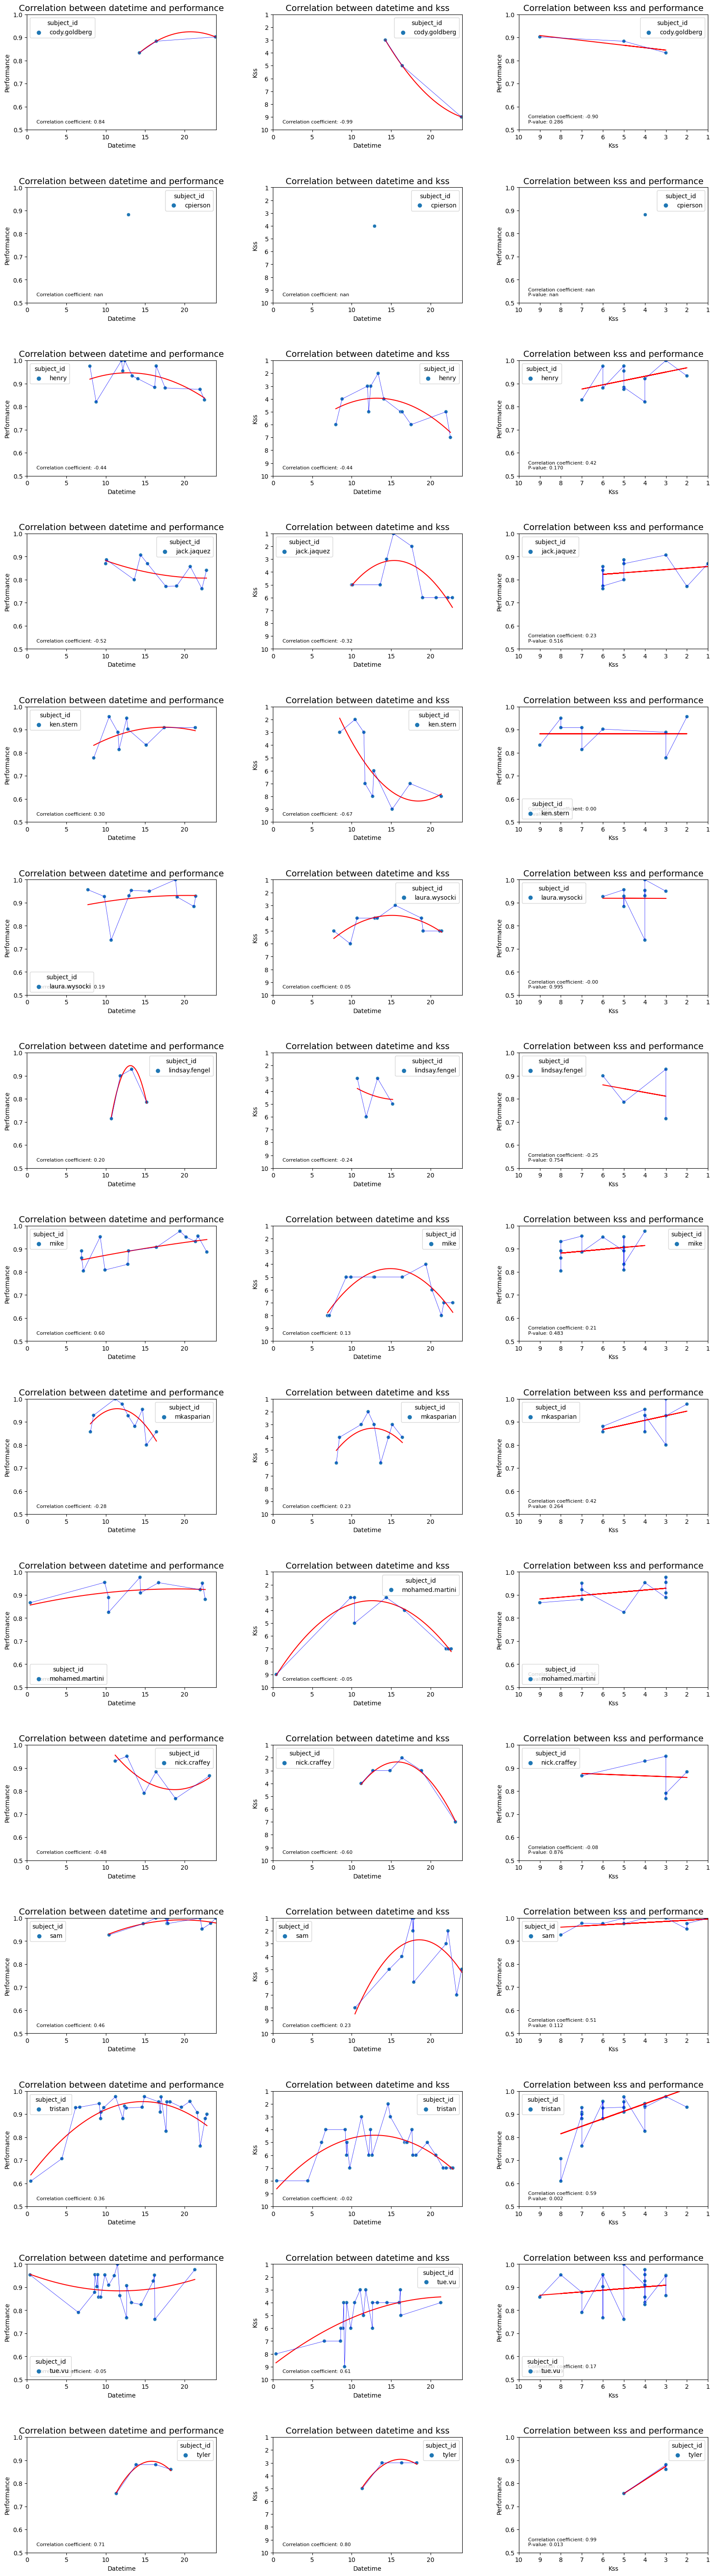

<ipython-input-90-da5bae5eabb0>:72: RankWarning: Polyfit may be poorly conditioned
  create_double_y_subplot(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'kss', 'subject_id', degree=4, flip_y2=True)
<ipython-input-90-da5bae5eabb0>:72: RankWarning: Polyfit may be poorly conditioned
  create_double_y_subplot(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'kss', 'subject_id', degree=4, flip_y2=True)
<ipython-input-90-da5bae5eabb0>:72: RankWarning: Polyfit may be poorly conditioned
  create_double_y_subplot(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'kss', 'subject_id', degree=4, flip_y2=True)
<ipython-input-90-da5bae5eabb0>:72: RankWarning: Polyfit may be poorly conditioned
  create_double_y_subplot(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'kss', 'subject_id', degree=4, flip_y2=True)
<ipython-input-90-da5bae5eabb0>:72: RankWarning: Polyfit may be poorly conditioned
  create_doub

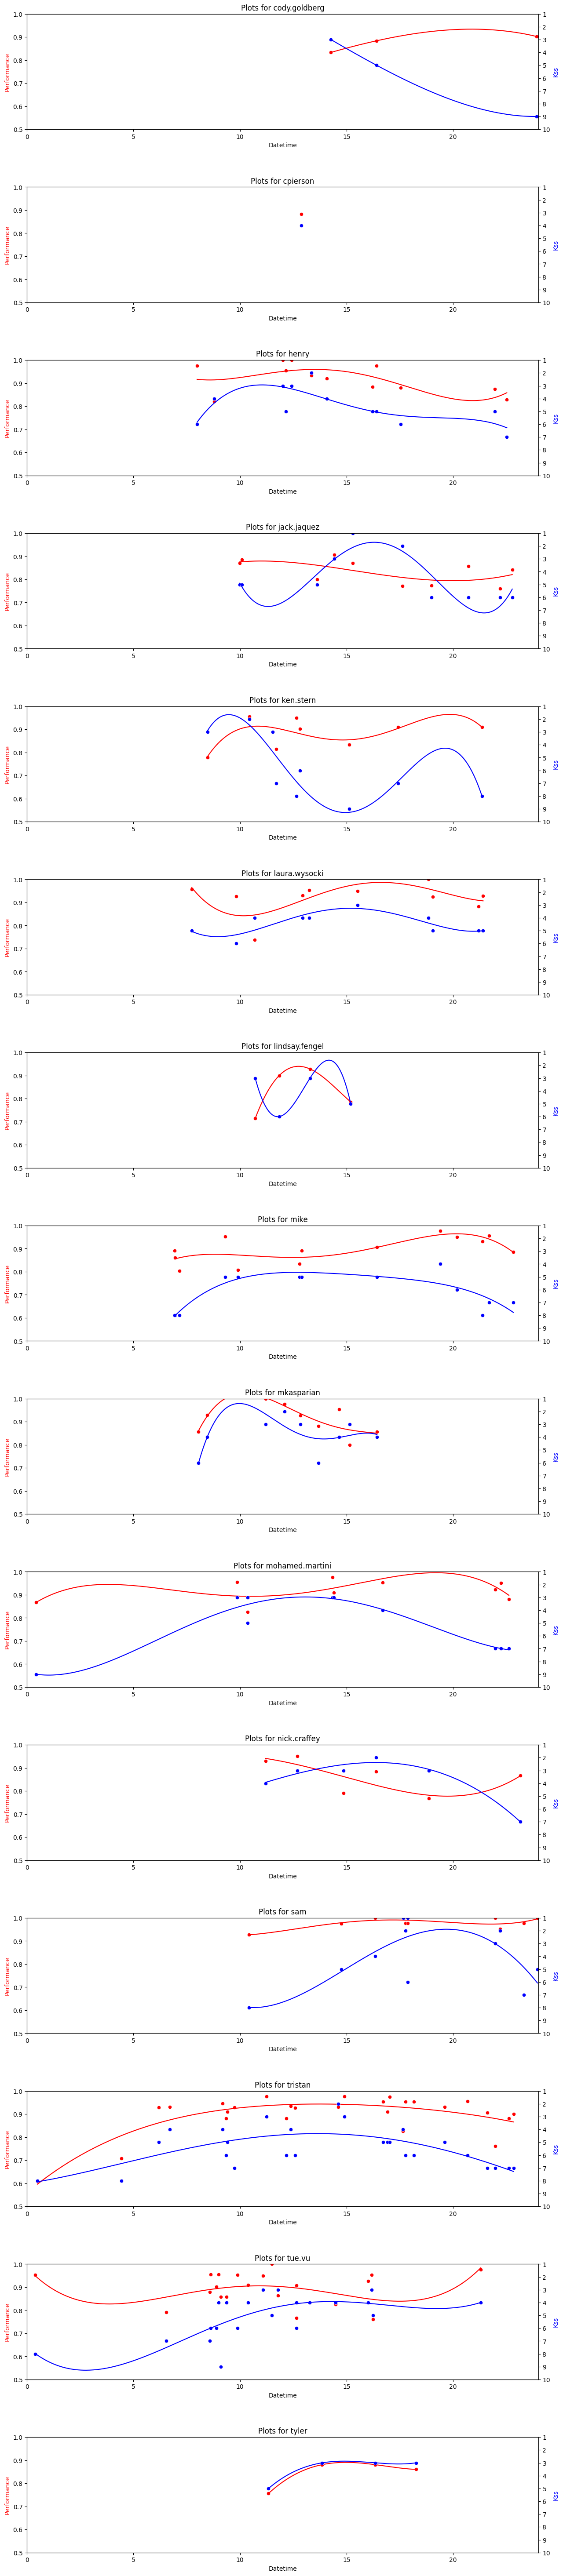

In [90]:
# 'no_mark' means Mark's data is removed
# 'newtime' means time is now a float between 0-24 instead of something like this: '2023-05-19 03:55:18'
# 'updated' means subject column is changed from "henry" to "subject_1" etc.

orig_file = 'pvt_df.csv'
orig_file_no_mark = 'pvt_df_no_mark.csv'
orig_file_newtime = 'pvt_df_newtime.csv'
orig_file_no_mark_newtime = 'pvt_df_no_mark_newtime.csv'

# Remove Mark's data and write into file 'pvt_df_no_mark.csv'
with open(orig_file, 'r') as input_file, open(orig_file_no_mark, 'w', newline = '') as output_file:
    reader = csv.reader(input_file)
    writer = csv.writer(output_file)
    for row in reader:
        if 'mark' not in row[0].lower():
            writer.writerow(row)
            
# Change orig_file's datetime format to float (0-24), and shift 4 hours back
df = pd.read_csv(orig_file)
df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2]) - pd.Timedelta(hours=4)
df.iloc[:, 2] = (df.iloc[:, 2].dt.hour * 3600 + df.iloc[:, 2].dt.minute * 60 + df.iloc[:, 2].dt.second) / 3600
df.to_csv('pvt_df_newtime.csv', index=False)

# Change orig_file_no_mark's datetime format to float (0-24), and shift 4 hours back
df = pd.read_csv(orig_file_no_mark)
df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2]) - pd.Timedelta(hours=4)
df.iloc[:, 2] = (df.iloc[:, 2].dt.hour * 3600 + df.iloc[:, 2].dt.minute * 60 + df.iloc[:, 2].dt.second) / 3600
df.to_csv('pvt_df_no_mark_newtime.csv', index=False)

pvt_df = pd.read_csv(orig_file)
pvt_df_no_mark = pd.read_csv(orig_file_no_mark)
pvt_df_newtime = pd.read_csv(orig_file_newtime)
pvt_df_no_mark_newtime = pd.read_csv(orig_file_no_mark_newtime)

# Change orig_file_no_mark's subject column where it has "subject_1" etc. rather than "henry"
unique_users = pvt_df_no_mark['subject_id'].unique()
user_mapping = {user: f'subject_{index+1}' for index, user in enumerate(unique_users)}
pvt_df_no_mark['subject_id'] = pvt_df_no_mark['subject_id'].map(user_mapping)
pvt_df_no_mark.to_csv('pvt_df_no_mark_updated.csv', index=False)
pvt_df_no_mark_updated = pd.read_csv('pvt_df_no_mark_updated.csv')

# Change orig_file_no_mark_updated's datetime format to float (0-24), and shift 4 hours back
df = pd.read_csv('pvt_df_no_mark_updated.csv')
df.iloc[:, 2] = pd.to_datetime(df.iloc[:, 2]) - pd.Timedelta(hours=4)
df.iloc[:, 2] = (df.iloc[:, 2].dt.hour * 3600 + df.iloc[:, 2].dt.minute * 60 + df.iloc[:, 2].dt.second) / 3600
df.to_csv('pvt_df_no_mark_updated_newtime.csv', index=False)
pvt_df_no_mark_updated_newtime = pd.read_csv('pvt_df_no_mark_updated_newtime.csv')

if not os.path.exists('pvt_plots'):
    os.makedirs('pvt_plots')
    
if not os.path.exists('pvt_plots_no_mark'):
    os.makedirs('pvt_plots_no_mark')

plt.clf()

# 1) metric correlation

# print('Graphs without data from Mark:')
# correlation_lin(pvt_df_no_mark_updated, 'pvt_plots_no_mark', 'kss', 'performance', 'subject_id', lines=False, flip_x=True, flip_y=False)
# correlation_lin(pvt_df_no_mark_updated_newtime, 'pvt_plots_no_mark', 'datetime', 'kss', 'subject_id', lines=False, flip_x=False, flip_y=True)

# 2) circadian rhythm analysis

# print('Graphs without data from Mark:')
# correlation_pol(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'subject_id', degree=4, lines=False, flip_x=False, flip_y=False)
# correlation_pol(pvt_df_no_mark_updated_newtime, 'pvt_plots_no_mark', 'datetime', 'kss', 'subject_id', degree=4, lines=False, flip_x=False, flip_y=True)
# correlation_pol(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'subject_id', degree=4, lines=False, flip_x=False, flip_y=False)

# 2.5) Grid of subplots and double y-axis plots
create_subplot_grid(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'subject_id')
create_double_y_subplot(pvt_df_no_mark_newtime, 'pvt_plots_no_mark', 'datetime', 'performance', 'kss', 'subject_id', degree=4, flip_y2=True)

# # 3) metric histograms

# metrics = ['performance', 'lapses', 'mean_rt']
# metric_names = ['Performance', 'Lapses', 'Mean Reaction Time']

# print('Graph without data from Mark:')
# for i in range(len(metrics)):
#     metric_histogram(pvt_df_no_mark, 'pvt_plots_no_mark', metrics[i], metric_names[i])
#     print_stats(pvt_df_no_mark, metrics[i])
    
# # 4) kss histogram

# print('Graph without data from Mark:')
# kss_histogram(pvt_df_no_mark, 'pvt_plots_no_mark')
# print_stats(pvt_df_no_mark, 'kss')

# # 5) KSS x PVT performance scatterplot

# print('Graph without data from Mark:')
# performance_kss_scatter(pvt_df_no_mark, 'pvt_plots_no_mark')
 
# # 6) subject vs performance range plot

# print('Graph without data from Mark:')
# subject_performance_range(pvt_df_no_mark, 'pvt_plots_no_mark')

# # 7) create second version of plot with reduced rance since mark's sessions caused the range to skew low

# print('Graph without data from Mark:')
# subject_performance_range(pvt_df_no_mark, 'pvt_plots_no_mark', performance_range=(0.6, 1.02))
